**Как работает CAP кривая**

Источники:

- https://en.wikipedia.org/wiki/Cumulative_accuracy_profile - статься на википедии посвященная CAP кливой;
- https://medium.com/geekculture/classification-model-performance-evaluation-using-auc-roc-and-cap-curves-66a1b3fc0480 - простенькая статейка но с примерами кода на `python3`.

Бибилиотеки

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import auc

# Определение CAP кривой

**CAP кривая** представляет собой кумулятивное число положительных исходов по оси ординат по отношению к соответствующему кумулятивному числу классифицирующего параметра по оси абсцысс.<br>

### Базовое понимае CAP кривой на примере

**Например**, пусть некоторая модель предсказывает вероятности $\hat{p}_i$ того, что $y_i=1$ (у $i$-го клиента положительный исход, проявление признака). Допустим в тестовой выборке у нас 5 наблюдений имеются предсказания для них и настоящий класс:

| $\hat{p}_i$ | $$y_i$$ |
| ----------- | ----- |
|     0.2     |   1   |
|     0.6     |   0   |
|     0.8     |   1   |
|     0.7     |   1   |
|     0.4     |   0   |


Для того чтобы построить CAP кривую надо:<br>
1\. Отсортировать наблюдения по убыванию $\hat{p}_i$;

| $\hat{p}_i$ | $$y_i$$ |
| ----------- | ----- |
|     0.8     |   1   |
|     0.7     |   1   |
|     0.6     |   0   |
|     0.4     |   0   |
|     0.2     |   1   |

2\. Пронумеровать каждое наблюедение начиная от 1;


|$i$| $\hat{p}_i$ | $$y_i$$ |
|-| ----------- | ----- |
|1|     0.8     |   1   |
|2|     0.7     |   1   |
|3|     0.6     |   0   |
|4|     0.4     |   0   |
|5|     0.2     |   1   |

3\. Вычислить кумулятивную сумму $y_i$ ($\hat{S}_{\hat{y}}$);

|$i$| $\hat{p}_i$ | $$y_i$$ |$$\hat{S}_{\hat{y}}$$|
|-| ----------- | ----- |---------------------|
|1|     0.8     |   1   |   1                 |
|2|     0.7     |   1   |   2                 |
|3|     0.6     |   0   |   2                 |
|4|     0.4     |   0   |   2                 |
|5|     0.2     |   1   |   3                 |

Начиная с точки (0,0)  и продолжая пременными $i$ и $\hat{S}_{\hat{y}}$ на график наносят CAP кривую.

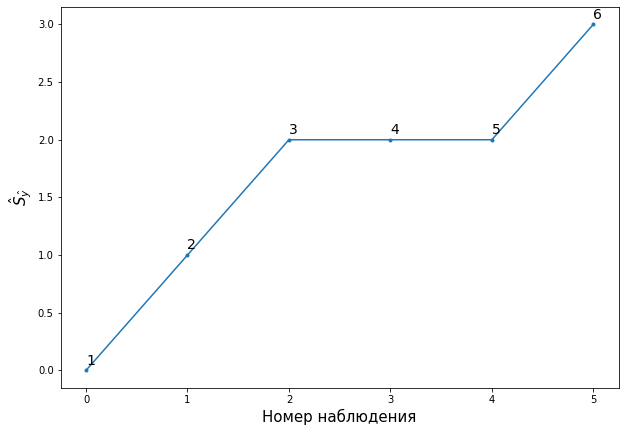

In [77]:
plt.figure(figsize = [10,7])

x = list(range(6))
y = [0,1,2,2,2,3]

plt.plot(x, y, marker = ".")

plt.xlabel("Номер наблюдения", fontsize = 15)
ans = plt.ylabel("$\hat{S}_{\hat{y}}$", fontsize = 15)

for x_val, y_val in zip(x, y):
    plt.text(x_val, y_val + 0.05, x_val + 1, fontsize = 14)

### Относительная CAP кривая

Если по оси абсцысс откладывать не номер наблюдения $i$ а $i/n$ (где $n$ - число наблюдений на которых вычисляется CUP кривая) и по оси ординат откладывать не кумулятивную сумму, но кумулятивный процент (ecdf, $\hat{F}_{\hat{y}}$), то получиться так мной названная *относительная CAP* кривая, такая же по форме но ограниченная в единичном квадрате:

|$i$| $\hat{p}_i$  | $$y_i$$ |$$\hat{S}_{\hat{y}}$$|$$i/n$$|$$\hat{F}_{\hat{y}}$$|
|---| ------------ | ------- |---------------------|-------|---------------------|
| 1 |     0.8      |    1    |        1            |  0.2  |          0.2        |
| 2 |     0.7      |    1    |        2            |  0.4  |          0.8        |
| 3 |     0.6      |    0    |        2            |  0.6  |          0.8        |
| 4 |     0.4      |    0    |        2            |  0.8  |          0.8        |
| 5 |     0.2      |    1    |        3            |   1   |           1         |

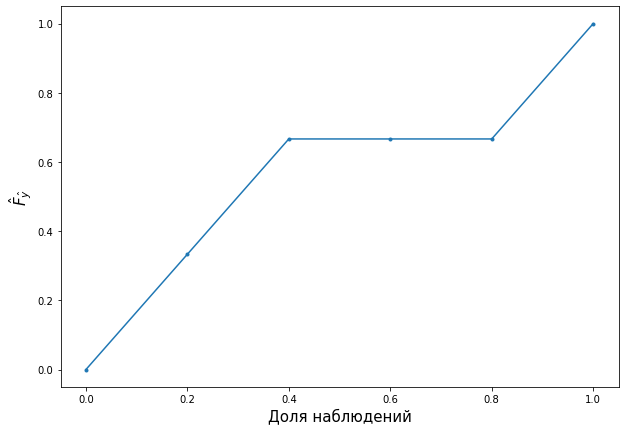

In [63]:
plt.figure(figsize = [10,7])

y_rel = [0, 1/3, 2/3, 2/3, 2/3, 1]
x_rel = [i/5 for i in range(6)]

plt.plot(
    x, y, marker = "."
)

plt.xlabel("Доля наблюдений", fontsize = 15)
ans = plt.ylabel("$\hat{F}_{\hat{y}}$", fontsize = 15)

# Идеальная CAP кривая

Играет важную роль в понимании механизма `CUP` кривой

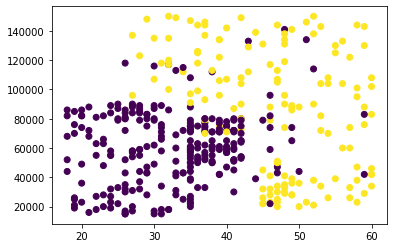

In [39]:
plt.scatter(
    data["Age"], 
    data["EstimatedSalary"],
    c = data["Purchased"]
)

In [11]:
data = pd.read_csv("Social_Network_Ads.csv")

x = data.iloc[:, 2:4]
y = data.iloc[:, 4]

x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = 0.3, random_state = 0
)

classifier = RandomForestClassifier(n_estimators = 400)
 
# training
classifier.fit(x_train, y_train)
 
# predicting
pred = classifier.predict_proba(x_test)[:,1]

# print("Accuracy : ", accuracy_score(y_test, pred) *  100)

In [14]:
sorted(zip(pred, y_test), reverse = True)

[(1.0, 1),
 (0.9975, 1),
 (0.9975, 1),
 (0.995, 1),
 (0.995, 1),
 (0.9925, 1),
 (0.9925, 1),
 (0.9875, 1),
 (0.985, 1),
 (0.985, 1),
 (0.9775, 1),
 (0.9775, 1),
 (0.975, 1),
 (0.9725, 1),
 (0.9675, 1),
 (0.9675, 1),
 (0.9625, 1),
 (0.96, 1),
 (0.9525, 1),
 (0.95, 1),
 (0.9425, 1),
 (0.9425, 1),
 (0.94, 1),
 (0.9225, 0),
 (0.8975, 0),
 (0.8875, 1),
 (0.8725, 0),
 (0.845, 1),
 (0.84, 1),
 (0.84, 1),
 (0.835, 1),
 (0.8225, 1),
 (0.8175, 1),
 (0.815, 1),
 (0.765, 1),
 (0.7425, 0),
 (0.7175, 1),
 (0.69, 1),
 (0.685, 1),
 (0.6325, 0),
 (0.625, 1),
 (0.4975, 0),
 (0.495, 1),
 (0.4875, 0),
 (0.445, 0),
 (0.435, 1),
 (0.4325, 1),
 (0.355, 0),
 (0.29, 0),
 (0.1525, 0),
 (0.13, 0),
 (0.0925, 0),
 (0.075, 0),
 (0.0625, 0),
 (0.0475, 0),
 (0.045, 0),
 (0.04, 0),
 (0.0325, 0),
 (0.03, 0),
 (0.0275, 0),
 (0.025, 0),
 (0.025, 0),
 (0.0225, 0),
 (0.0225, 0),
 (0.0175, 0),
 (0.0175, 0),
 (0.0175, 0),
 (0.0175, 0),
 (0.015, 0),
 (0.015, 0),
 (0.015, 0),
 (0.015, 0),
 (0.0125, 1),
 (0.0075, 0),
 (0.0075, 

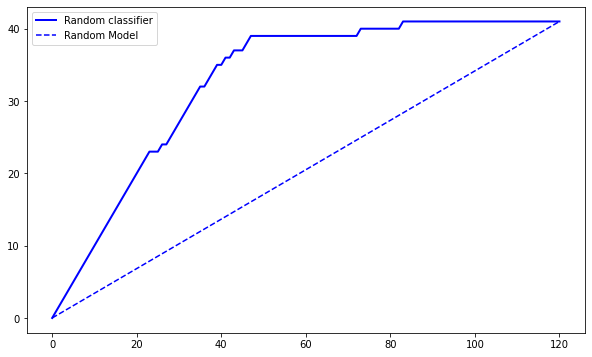

In [12]:
# length of the test data
total = len(y_test)
 
# Counting '1' labels in test data
one_count = np.sum(y_test)
 
# counting '0' labels in test data
zero_count = total - one_count
 
plt.figure(figsize = (10, 6))

lm = [y for _, y in sorted(zip(pred, y_test), reverse = True)]

x = np.arange(0, total + 1)
y = np.append([0], np.cumsum(lm))

plt.plot(x, y, c = 'b', label = 'Random classifier', linewidth = 2)


plt.plot(
    [0, total], [0, one_count], c = 'b',
    linestyle = '--', label = 'Random Model'
)


plt.legend()

In [41]:
model = LogisticRegression().fit(
    data[["Age", "EstimatedSalary"]], 
    data["Purchased"]
)

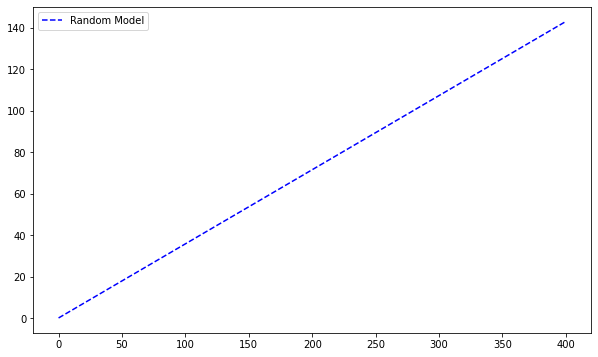

In [28]:
# length of the test data
total = len(y_test)
 
# Counting '1' labels in test data
one_count = np.sum(y_test)
 
# counting '0' labels in test data
zero_count = total - one_count
 
plt.figure(figsize = (10, 6))
 
# x-axis ranges from 0 to total people contacted
# y-axis ranges from 0 to the total positive outcomes.
 
plt.plot([0, total], [0, one_count], c = 'b',
         linestyle = '--', label = 'Random Model')
plt.legend()